### **THINK TANK CASE STUDY**

### **DATA PROCESSING**

## The case study revolves around 4 data sets consisting of:
### **ORDERS :**
### 1.) *Orders (Order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order)*
### 2.) *Order_Products (Order_id, product_id, add_to_cart_order)*


### **SEGEMNT & ITEAMS :**
### 3.) *Departments (Department_id, Department)*
### 4.) *Products (Product_id, department_id, product_name)*

### -- **Below is a visual representation of the work flow on how the data sets are joined using primary key in Dataiku to fasten the preprocess stage in-order to increase efficiency**

<p align="center">
  <img src="assets/Dataflow.JPG">
</p>

## **OUR STORY**:

## Kat-Max e-grocery is a renown up-and-coming new generation lifestyle brand. We have our brand presence in 10 counties and are always looking for new ways to improve and anticipate our customer needs. Covid-19 has definitely impacted the way our customers shop in our store, therefore the following are the questions we are trying to seek answers through this study in chronological order, to get deeper insights.

### **1.) Describe the datasets and the eventual anomalies you find.**

### **2.) Which patterns do you find in the purchasing behavior of the customers?**

### **3.) What are the categories and products the customers are most interested in?**

### **4.) Split customers into different groups based on their purchasing behavior**

### **5.) Justify your choice for your adopted method(s) and model(s).**

### **6.) Describe the defined customer groups. What are the features which are driving the differentiation amongst the different groups?**

### **7.) Optional: Give suggestions on how the business should treat these clusters differently.**

### **8.) At this point in your analysis, you are the dataset expert. Implement in your notebook any further ideas (initiatives, further analyses) you might have in mind which can be helpful for the business.**


<p align="center">
  <img src="assets/Kat-max.JPG">
</p>


## IMPORTING PACKAGES

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings

## LOADING DATA

In [51]:
cs1 = pd.read_csv("Data/Final Data.csv")

In [52]:
cs1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [53]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [54]:
cs1.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

## **1.) Describe the datasets and the eventual anomalies you find:**

## The final dataset consists of 2019501 Rows & 12 Columns which are as follows :
### •	**order_id** – (*A unique number to identity the order*)
### •	**user_id**	-  (*A unique number to identify the user*)
### •	**order_number** – (*Number of the order*)
### •	**order_dow** – (*Day of the Week the order was made*)
### •	**order_hour_of_day** – (*Time of the order*)	
### •	**days_since_prior_order** - (*History of the order*)	
### • **product_id** – (*Id of the product*)
### •	**add_to_cart_order** – (*Number of items added to cart*)
### •	**reordered** – (*If the reorder took place*)
### •	**department_id**	- (*Unique number allocated to each department*)
### •	**department** – (*Names of the departments*) 
### •	**product_name** – (*Name of the products*) 



## From the preliminary analysis we could see that we have null value in “ days_since_prior_order” which is 6.8 % of the entire data set. The following are the steps we will do to further continue on the explanatory analysis in sequential order.

### **1.) Taking care of Null Values**
### **2.) Converting the data types to integers**
### **3.) Feature investigation**

In [98]:
cs1['days_since_prior_order'].unique()

array([-1,  3,  6,  7, 30, 20,  4,  8, 15, 10, 28,  9, 12, 11,  2, 25, 13,
       29, 14, 21,  5,  1, 18,  0, 19, 17, 22, 26, 24, 16, 23, 27],
      dtype=int64)

## TAKING CARE OF NULL VALUES 

In [99]:
for col in cs1.columns:
    if cs1[col].dtypes == 'float64':
        cs1[col].fillna(-1,inplace=True) 

In [100]:
cs1.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

## COVERTING THE DATA TYPES TO INTEGERS

In [148]:
cs1['days_since_prior_order']= cs1['days_since_prior_order'].astype(np.int64)

In [149]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


## INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE

In [103]:
for colum in cs1:
    unique_values = np.unique(cs1[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

### **2.) Which patterns do you find in the purchasing behavior of the customers?**

In [104]:
cs1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

C:\Users\rashokkumar\Anaconda3\envs\Air_Pro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


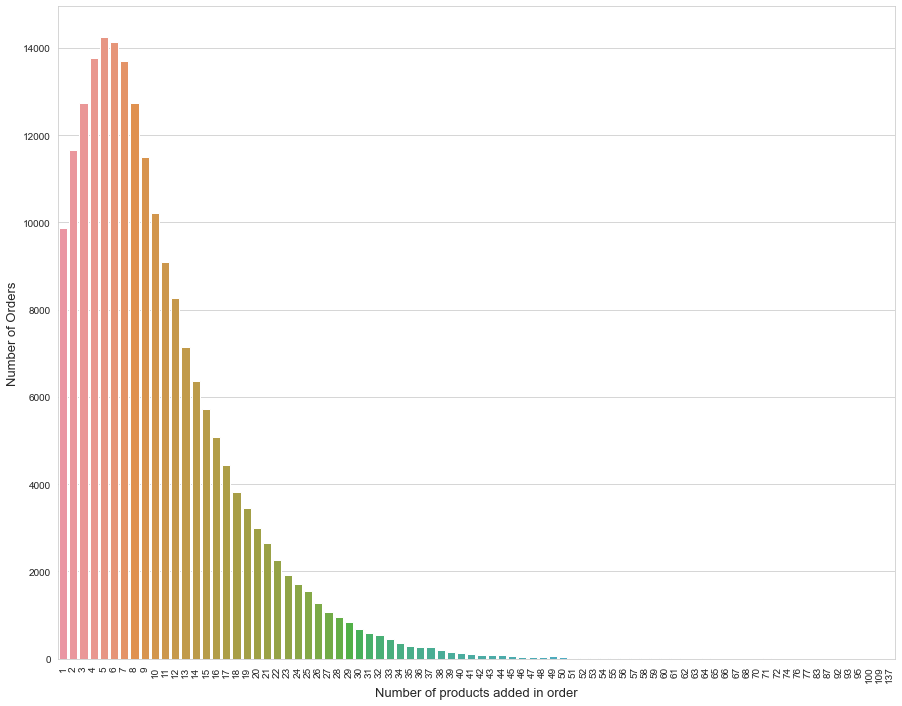

In [105]:
grouped = cs1.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()


### RESULTS

### **From the above plot we could observe that customers are usually order around 4-7 products.**


### **3.) What are the categories and products the customers are most interested in?**

In [106]:
grouped = cs1.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15]
grouped

,product_id,product_name,department,reordered
23,24,fresh fruits,produce,226039
82,83,fresh vegetables,produce,212611
122,123,packaged vegetables fruits,produce,109596
119,120,yogurt,dairy eggs,90751
20,21,packaged cheese,dairy eggs,61502
83,84,milk,dairy eggs,55150
114,115,water seltzer sparkling water,beverages,52564
106,107,chips pretzels,snacks,45306
90,91,soy lactosefree,dairy eggs,39389
111,112,bread,bakery,36381


C:\Users\rashokkumar\Anaconda3\envs\Air_Pro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


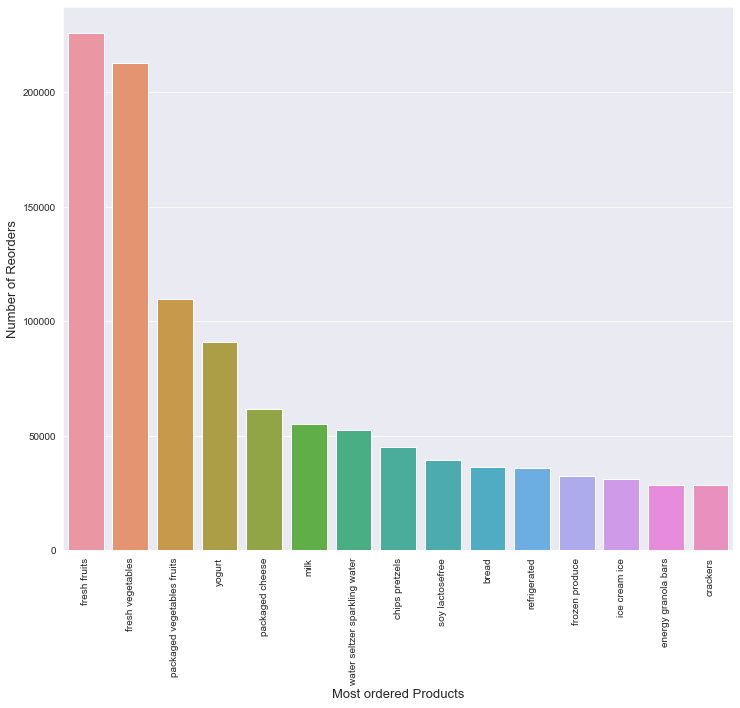

In [107]:
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

### RESULTS:

### **From the above analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "Packaged Cheese" are top 5 most reordered products.**

## **Reordered Frequency:**

In [115]:
grouped = cs1.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratios'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratios
0,0,828515,0.410257
1,1,1190986,0.589743


### 59 % of ordered products are previously ordered by customers.

C:\Users\rashokkumar\Anaconda3\envs\Air_Pro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


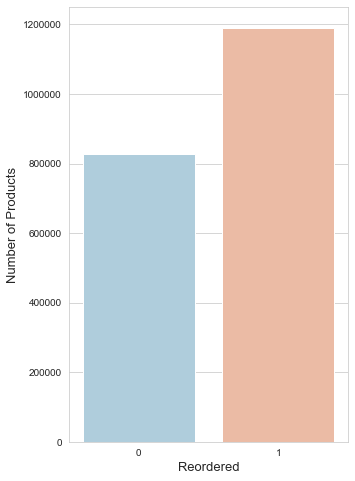

In [116]:
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### **4.) Split customers into different groups based on their purchasing behavior**

In [117]:
len(cs1.product_id.unique())

134

## WE WILL BE USING KMEANS CLUSTERING TO SPLIT CUSTOMERS INTO DIFFERNT GROUPS BASED ON THEIR PURCHASING PATTERN

In [118]:
clst_prd = pd.crosstab(cs1['user_id'], cs1['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [165]:
# Running Kmeans

X_train = clst_prd.values

# We will start with 6 clusters

kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)


# Print the clusters it assigns to each observation

print("The cluster are  :", kmeans.labels_)


# Print the Inertia
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 2 4 ... 0 2 4]
The Inertia is : 4996208.439176548


### TRYING TO IDENTIFY THE OPTIMINAL NUMBER OF CLUSTERS

In [166]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543563.710047397
The inertia for : 3 Cluster is :  6284990.237454652
The inertia for : 4 Cluster is :  5731903.416917547
The inertia for : 5 Cluster is :  5281359.3865858
The inertia for : 6 Cluster is :  4996208.439176548
The inertia for : 7 Cluster is :  4763172.962728115
The inertia for : 8 Cluster is :  4586203.264387518
The inertia for : 9 Cluster is :  4436005.489910801


Text(0.5, 1.0, 'Inertia Plot per k')

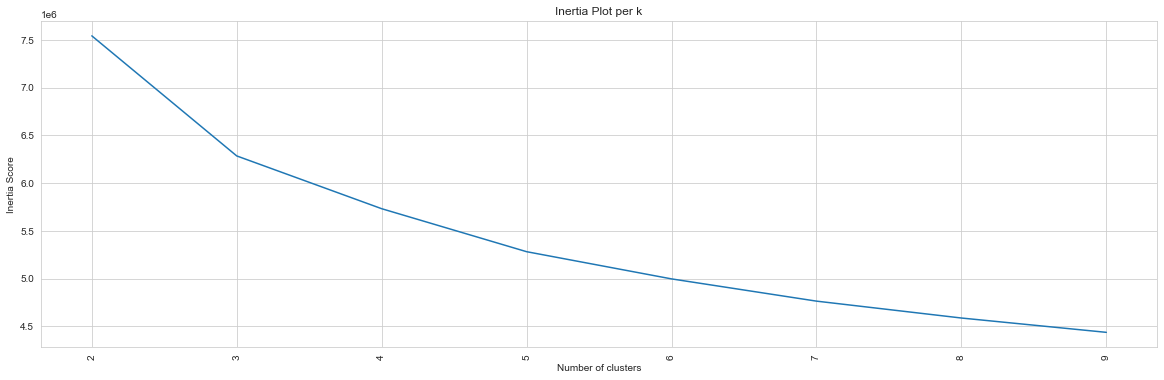

In [169]:
# Creating the scree plot for Inertia - Elbow method
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [180]:
# Re-running K means on 4 clusters
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# Predictions for new data

predictions = kmeans.predict(X_train)

# Calculating the Counts of the cluster
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating the plot
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3"])

# Display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,29419,9871,2061,63922


In [181]:
kmeans.labels_

array([3, 0, 3, ..., 3, 0, 0])

In [223]:
Predictions

array([3, 0, 3, ..., 3, 0, 0])

### Running Principal Component Analysis (PCA) to visualize & Improve results

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 432x288 with 0 Axes>

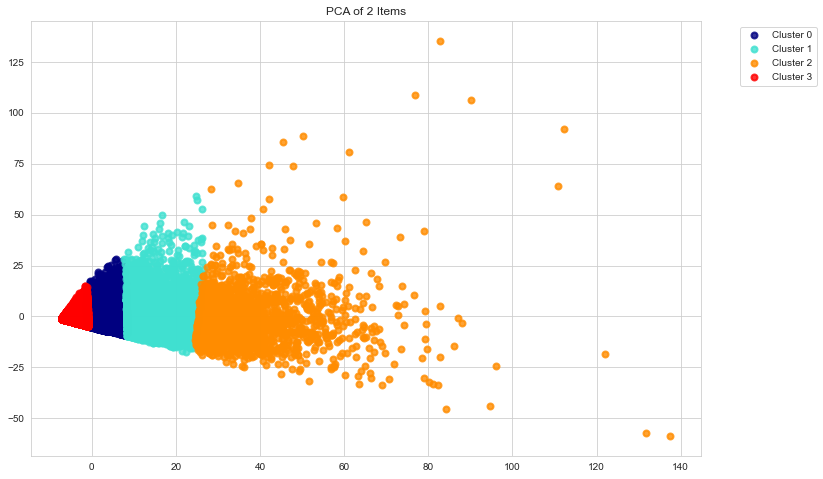

In [190]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

###  Identifying the "best" number of components

Total Variance in our dataset is:  113.18063996195265
The 95% variance we want to have is:  107.52160796385502

Variance explain with 4 n_compononets:  95.01640082450713
Variance explain with 8 n_compononets:  105.3344003655439
Variance explain with 9 n_compononets:  106.69075586908637
Variance explain with 10 n_compononets:  107.98339847733622
Variance explain with 15 n_compononets:  112.05606051804934
Variance explain with 18 n_compononets:  113.0527029734667
Variance explain with 21 n_compononets:  113.18063996195265


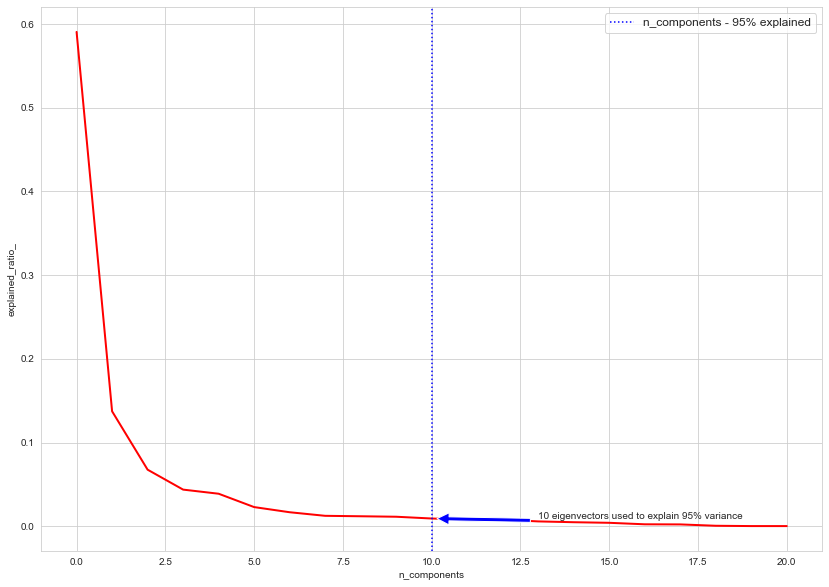

In [219]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# Plotting the Data
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(10,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('10 eigenvectors used to explain 95% variance', xy=(10, pca.explained_variance_ratio_[10]), 
             xytext=(13, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 6996449.421091005
The innertia for : 3 Clusters is: 5737915.221363453
The innertia for : 4 Clusters is: 5184878.422026769
The innertia for : 5 Clusters is: 4734380.446715717
The innertia for : 6 Clusters is: 4449279.327120534
The innertia for : 7 Clusters is: 4216351.4373290185
The innertia for : 8 Clusters is: 4039438.408483735
The innertia for : 9 Clusters is: 3889586.9052940784


Text(0.5, 1.0, 'Inertia Plot per k')

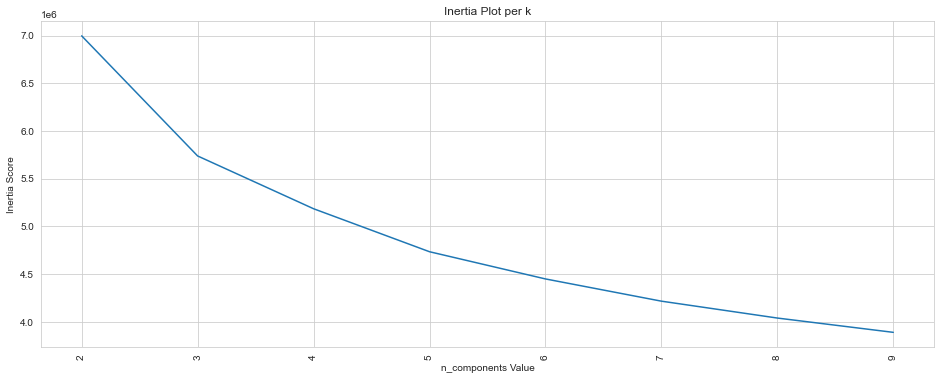

In [222]:
# Running PCA again

pca = PCA(n_components=10, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")